In [2]:
import pandas as pd
import os

# Specify the folder path containing your files
folder_path = './stability_26092024_1R0'

# Initialize an empty list to store individual DataFrames
dataframes = []


In [3]:
folder_path

'./stability_26092024_1R0'

In [4]:
# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)
        sensor_id = file_name.split('.')[0]

        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date-Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        df.loc[:, 'pd_val'] = df['Total_Sum']/df['Total_Counts']
        df.loc[:, 'pd_val_norm'] = df['pd_val']/df['V_Mean']
        df.loc[:, 'sensor_id'] = sensor_id
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames into one
final_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(final_df.head())


             Date-Time  Laser_Power   Total_Sum     Total_Sqr    V_Mean  \
0  2024-09-26-12:30:16           15  96482227.0  1.301824e+11  0.269333   
1  2024-09-26-12:30:33           15  96681333.0  1.306784e+11  0.270630   
2  2024-09-26-12:30:49           15  96472582.0  1.300834e+11  0.269055   
3  2024-09-26-12:31:05           15  96805534.0  1.307578e+11  0.268418   
4  2024-09-26-12:31:22           15  96759506.0  1.308592e+11  0.269807   

      Std_V  Temp  Humidity  Total_Counts       pd_val  pd_val_norm sensor_id  
0  0.001788  21.3      38.0       71507.0  1349.269680  5009.673215    ID_2_0  
1  0.000850  21.3      38.0       71530.0  1351.619363  4994.347712    ID_2_0  
2  0.001620  21.3      38.0       71547.0  1348.380533  5011.536431    ID_2_0  
3  0.001401  21.3      38.0       71670.0  1350.712069  5032.115051    ID_2_0  
4  0.001177  21.3      38.0       71547.0  1352.390820  5012.442201    ID_2_0  


## VARIABILITY OF EACH PARAMETER TOGETHER

pd_val:
  Mean: 2022.6852549854225
  Standard Deviation (σ): 947.6965182807575
  Standard Deviation as Percentage of Mean: 46.85338541648624%


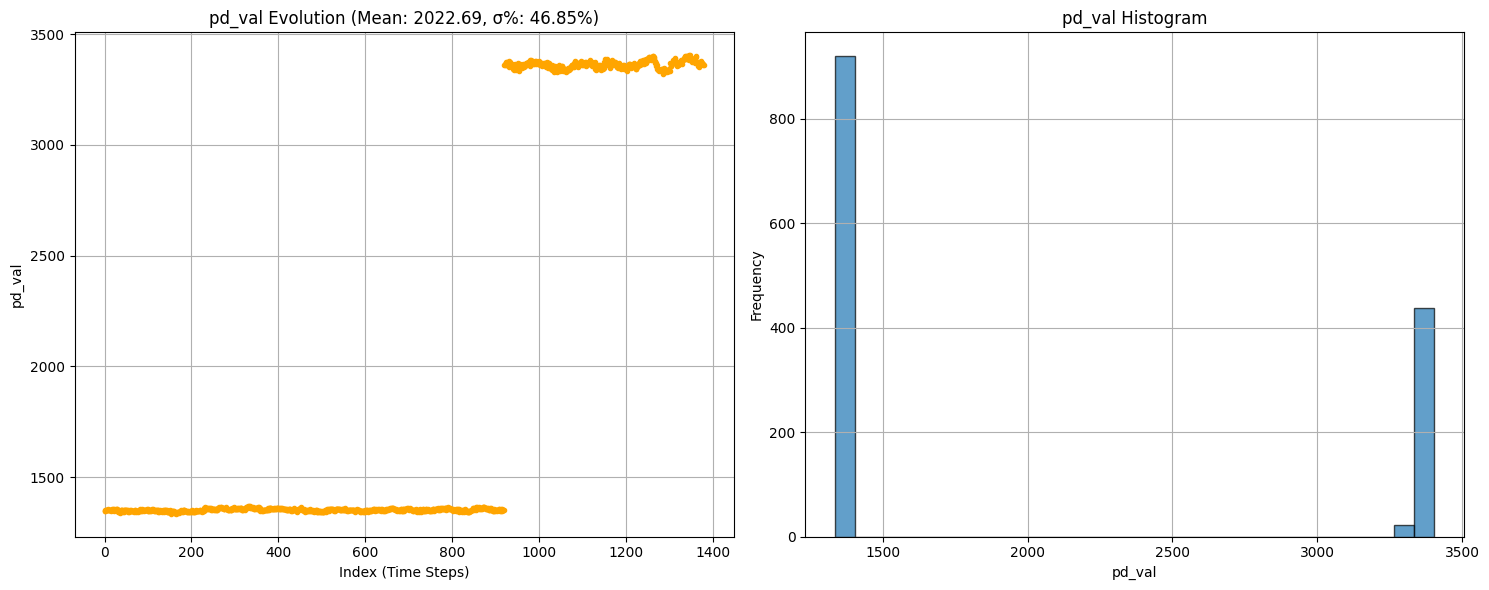

pd_val_norm:
  Mean: 7539.053397299962
  Standard Deviation (σ): 3534.7925490710477
  Standard Deviation as Percentage of Mean: 46.88642410116102%


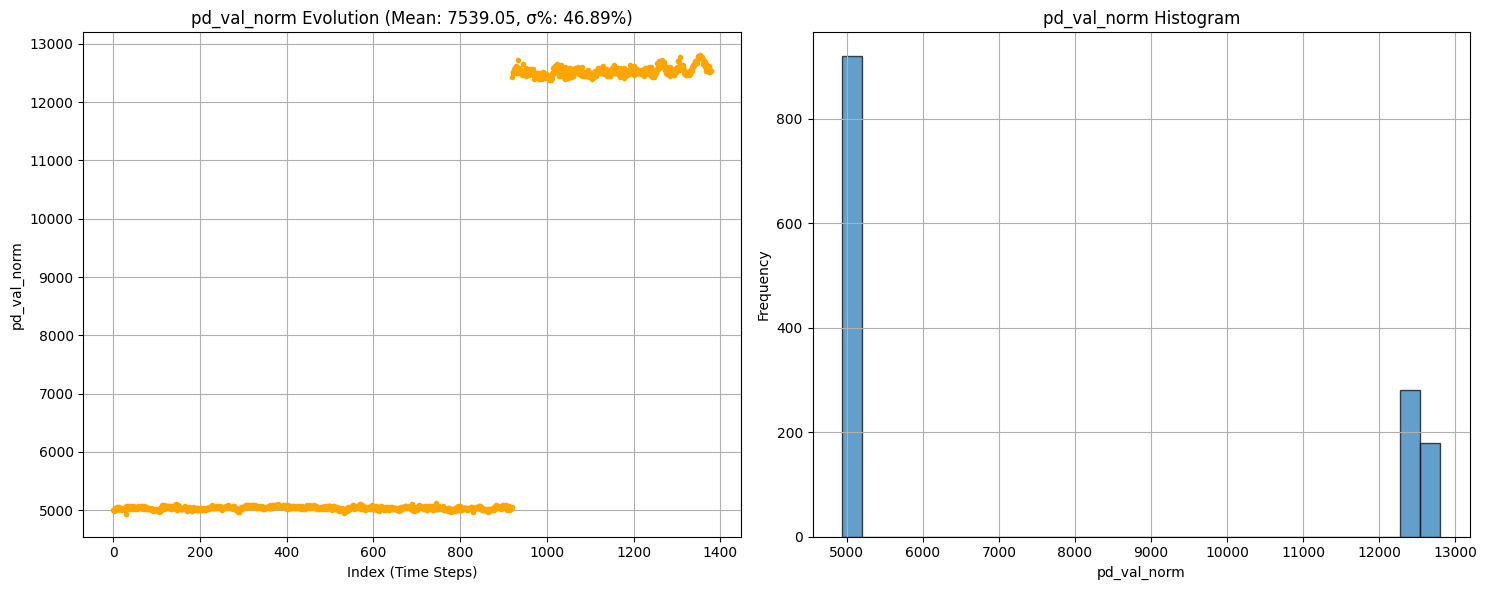

V_Mean:
  Mean: 0.2683360378391304
  Standard Deviation (σ): 0.0016247497581950072
  Standard Deviation as Percentage of Mean: 0.6054907016138689%


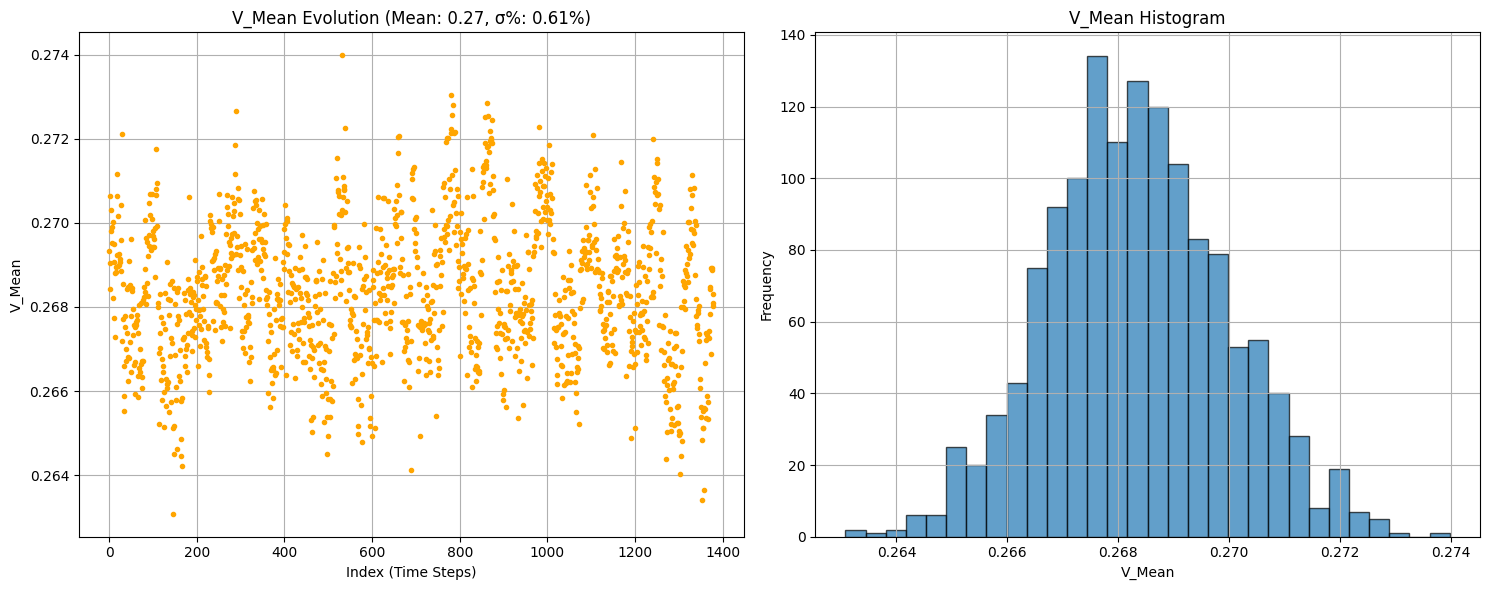

Temp:
  Mean: 21.221666666666668
  Standard Deviation (σ): 0.08858801610019022
  Standard Deviation as Percentage of Mean: 0.417441370141476%


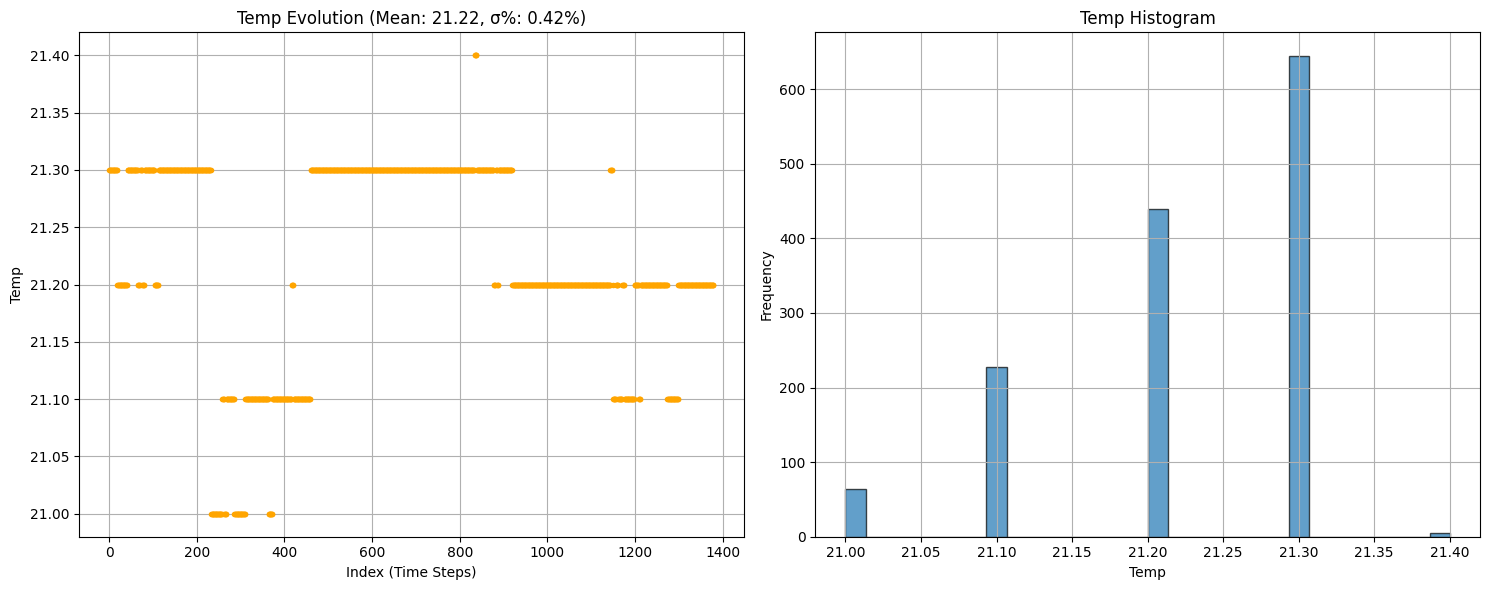

Humidity:
  Mean: 38.00797101449275
  Standard Deviation (σ): 0.5498449374931625
  Standard Deviation as Percentage of Mean: 1.4466569059513914%


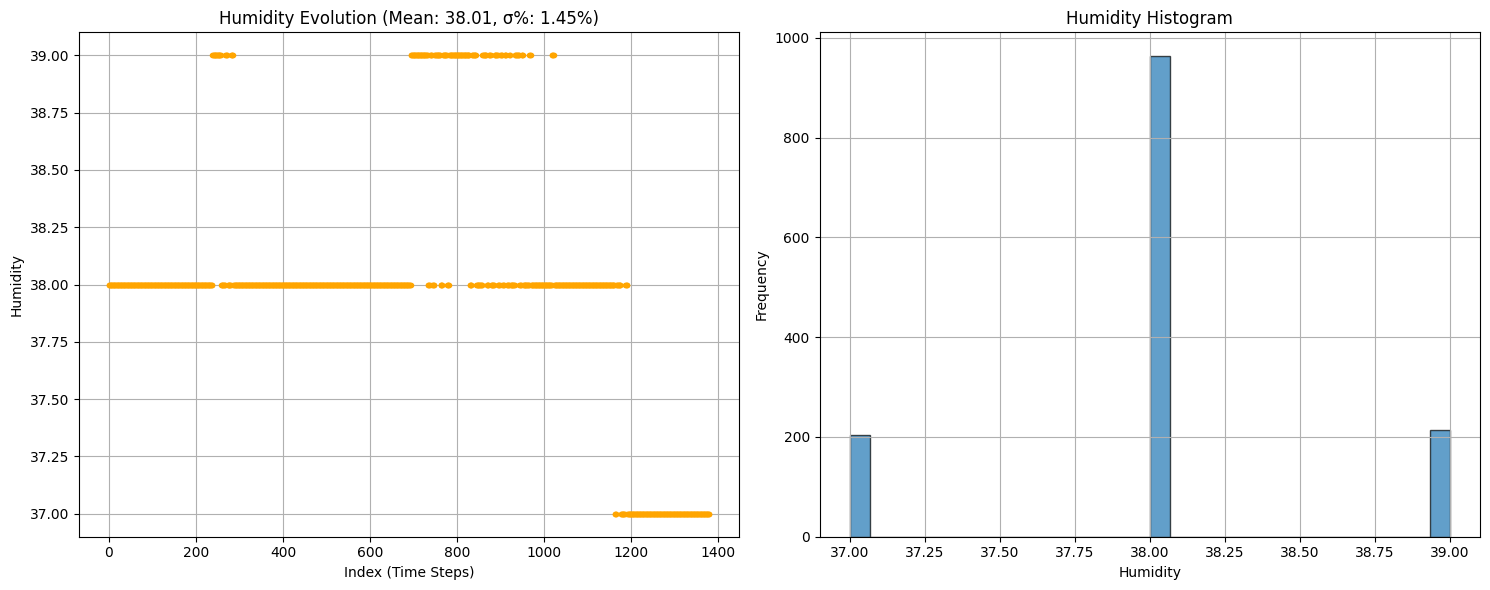

In [6]:
import matplotlib.pyplot as plt
# Plot each column except 'Date' and 'Time'
columns_to_plot = ['pd_val', 'pd_val_norm', 'V_Mean', 'Temp', 'Humidity']

# Create a plot for each column
for column in columns_to_plot:
    # Calculate mean and variance
    mean_value = final_df[column].mean()
    std_dev = final_df[column].std()  # Standard deviation
    
    # Calculate sigma as a percentage of the mean
    sigma_percentage = (std_dev / mean_value) * 100 if mean_value != 0 else 0
    
    # Print mean and sigma (standard deviation)
    print(f'{column}:')
    print(f'  Mean: {mean_value}')
    print(f'  Standard Deviation (σ): {std_dev}')
    print(f'  Standard Deviation as Percentage of Mean: {sigma_percentage}%')
    
    
    # Create a subplot with 2 plots side by side (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size as necessary

    # Plot the evolution of values (line plot) on the left
    axs[0].plot(final_df[column], '.', color='orange')
    axs[0].set_title(f'{column} Evolution (Mean: {mean_value:.2f}, σ%: {sigma_percentage:.2f}%)')
    axs[0].set_xlabel('Index (Time Steps)')
    axs[0].set_ylabel(column)
    axs[0].grid(True)

    # Plot the histogram on the right
    axs[1].hist(final_df[column], bins=30, edgecolor='black', alpha=0.7)
    axs[1].set_title(f'{column} Histogram')
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)

    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    
    # Show the combined plots
    plt.show()


## PLOTS FOR EACH DATASET SEPARATELY, FOR EACH VARIABLE 


Analysis for file: ID_2_0.txt
pd_val:
  Mean: 1348.4633143762233
  Standard Deviation (σ): 4.028458499756905
  Standard Deviation as Percentage of Mean: 0.29874438976639145%


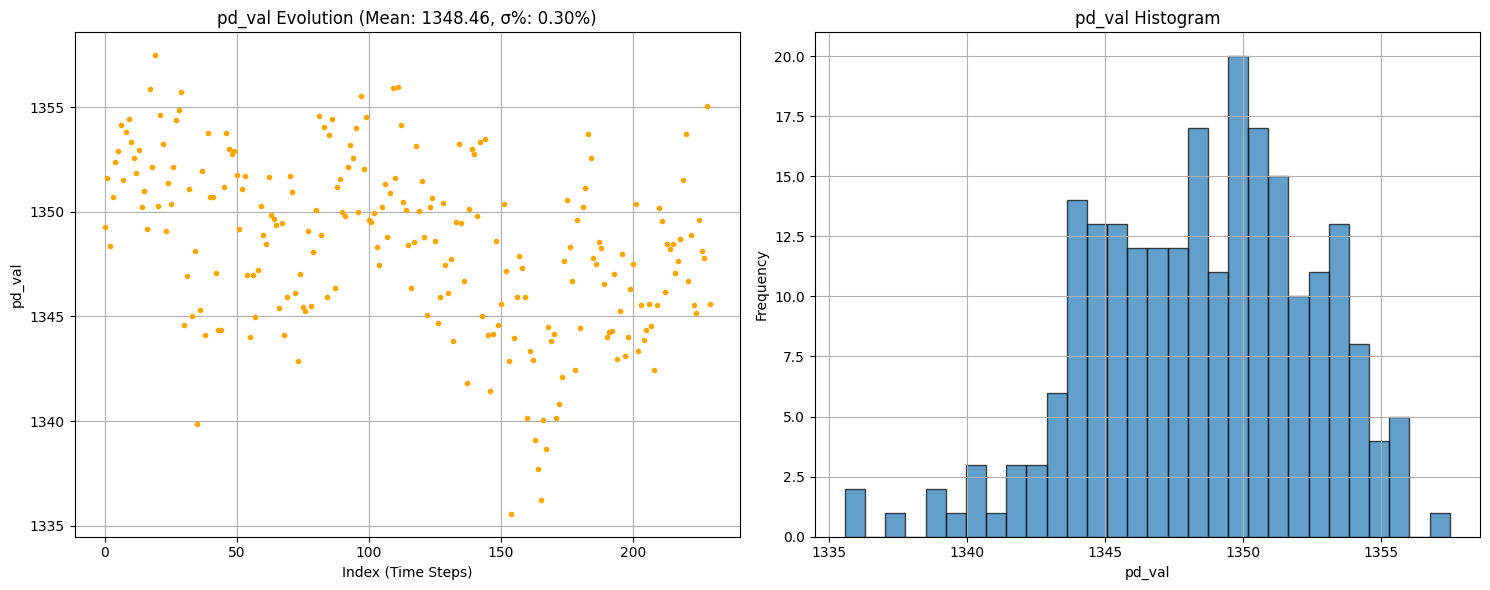

pd_val_norm:
  Mean: 5033.981833903959
  Standard Deviation (σ): 23.0759751417668
  Standard Deviation as Percentage of Mean: 0.45840402097500016%


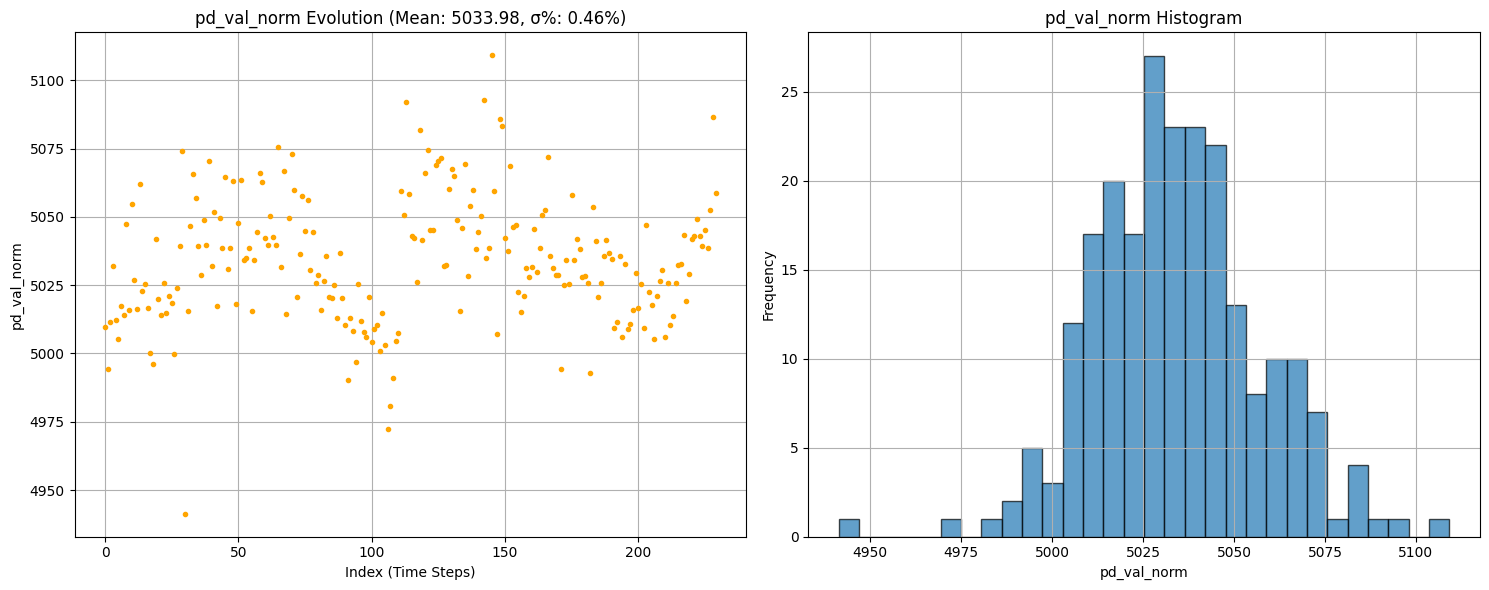

V_Mean:
  Mean: 0.26787783128260867
  Standard Deviation (σ): 0.0014879387287890498
  Standard Deviation as Percentage of Mean: 0.5554542239142171%


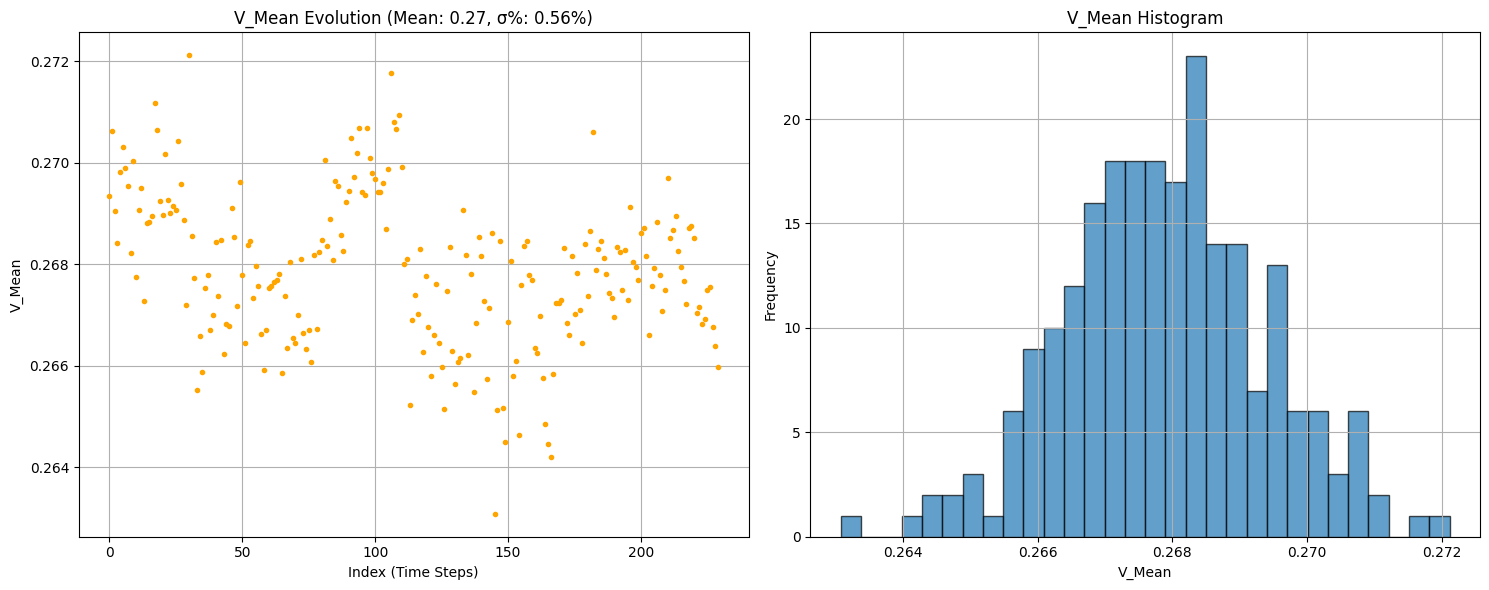


Analysis for file: ID_0_3.txt
pd_val:
  Mean: 1357.3916363810902
  Standard Deviation (σ): 4.2315607202278205
  Standard Deviation as Percentage of Mean: 0.3117420652089389%


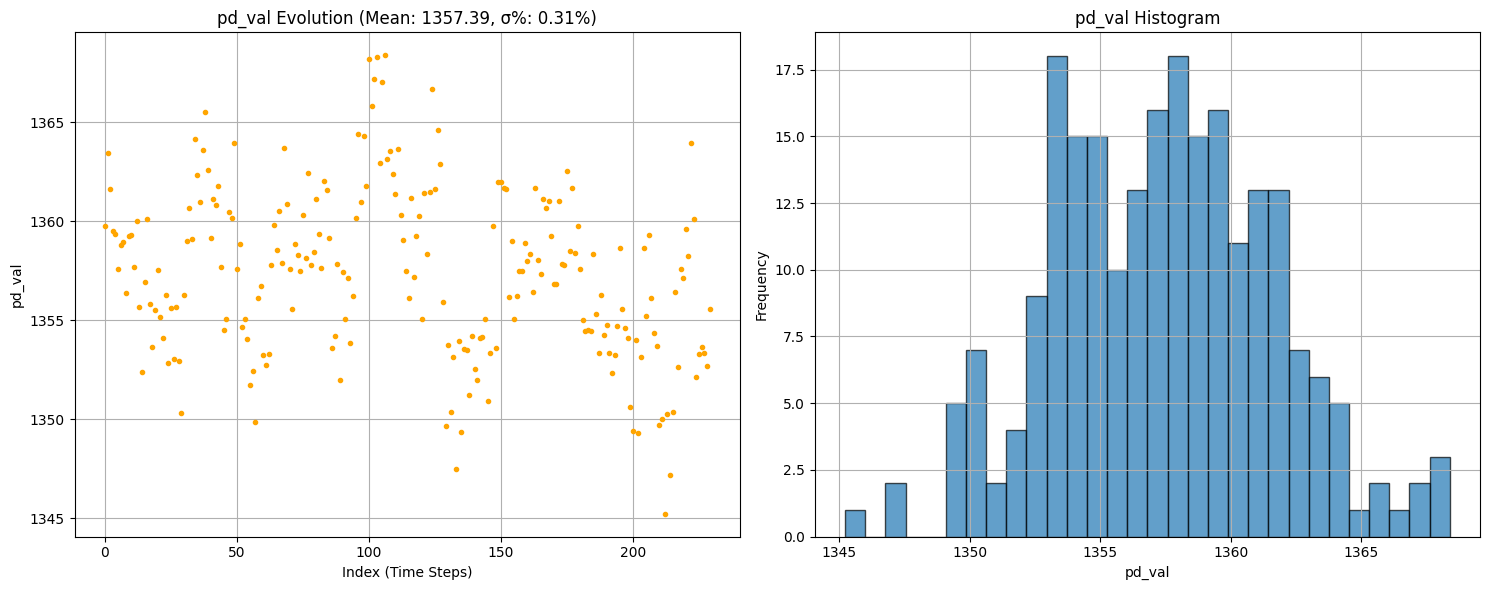

pd_val_norm:
  Mean: 5054.0344412445165
  Standard Deviation (σ): 21.131128752774302
  Standard Deviation as Percentage of Mean: 0.41810417001374695%


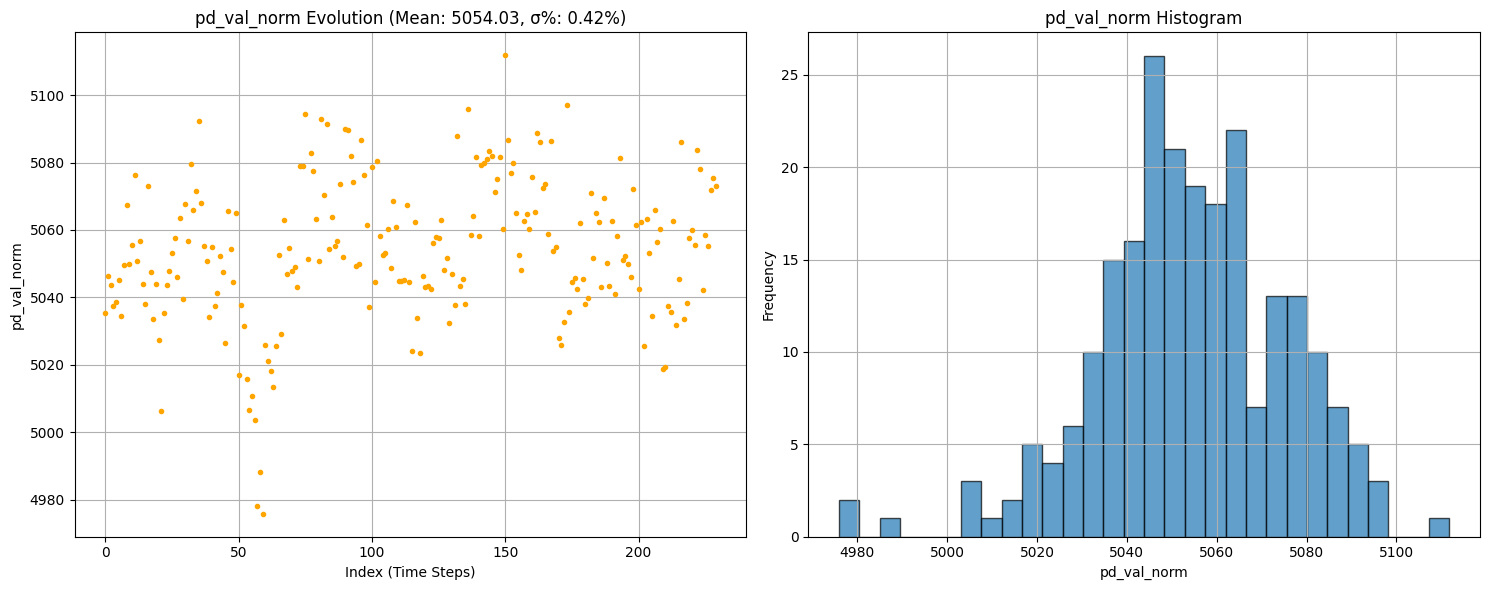

V_Mean:
  Mean: 0.2685797260521739
  Standard Deviation (σ): 0.0012351110519944544
  Standard Deviation as Percentage of Mean: 0.45986756712773014%


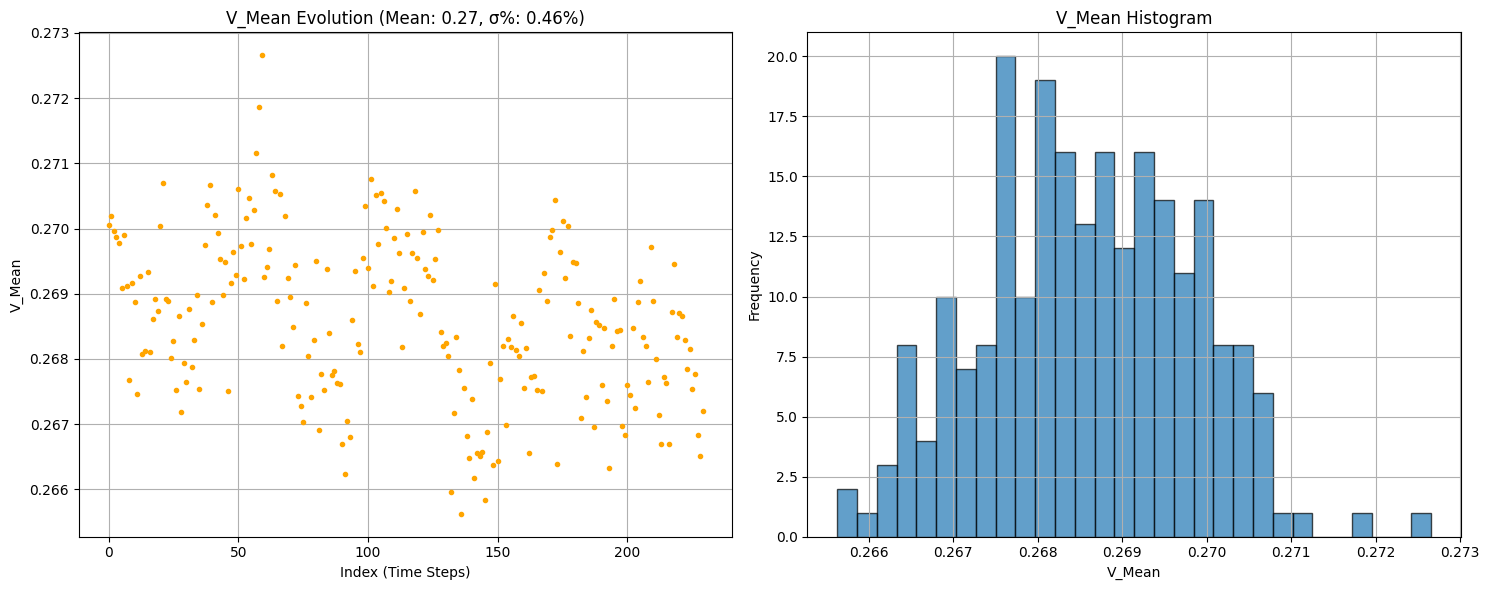


Analysis for file: ID_0_1.txt
pd_val:
  Mean: 1351.4863663685164
  Standard Deviation (σ): 4.2886657336044465
  Standard Deviation as Percentage of Mean: 0.3173295595373424%


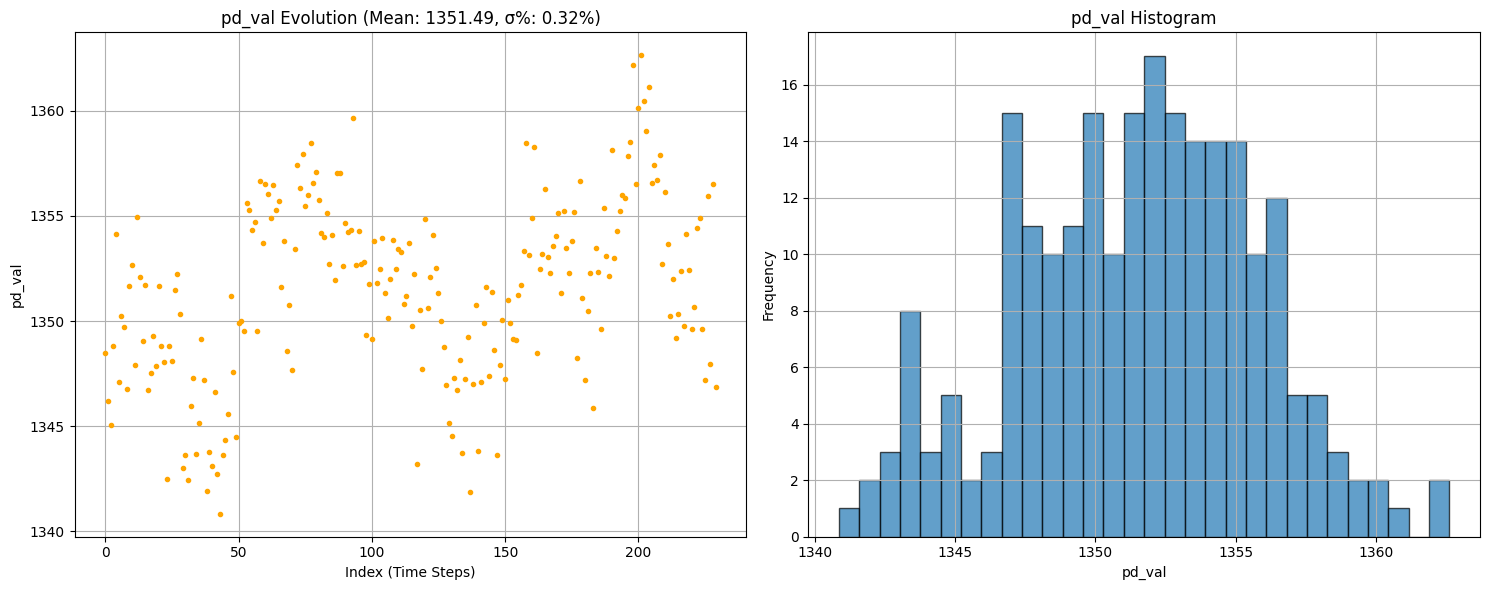

pd_val_norm:
  Mean: 5040.4836591736575
  Standard Deviation (σ): 23.506577933892583
  Standard Deviation as Percentage of Mean: 0.46635560242538865%


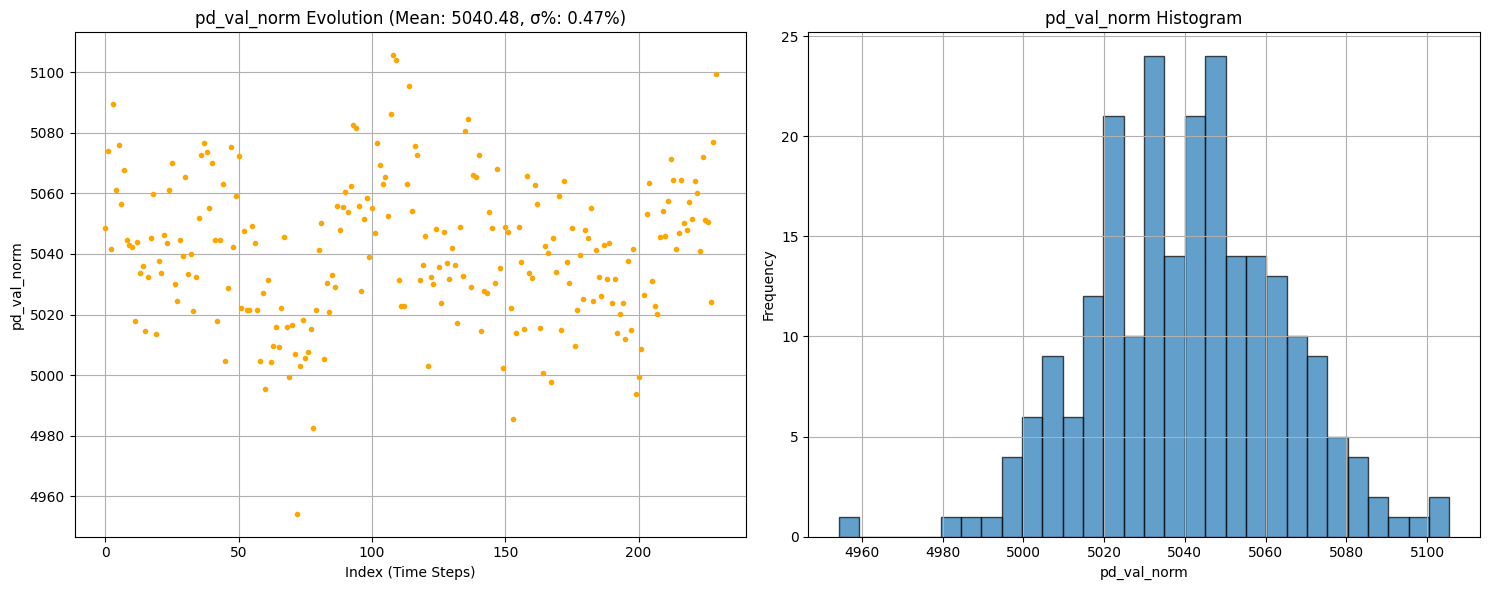

V_Mean:
  Mean: 0.26813296680869564
  Standard Deviation (σ): 0.0016550163417868012
  Standard Deviation as Percentage of Mean: 0.6172371720958888%


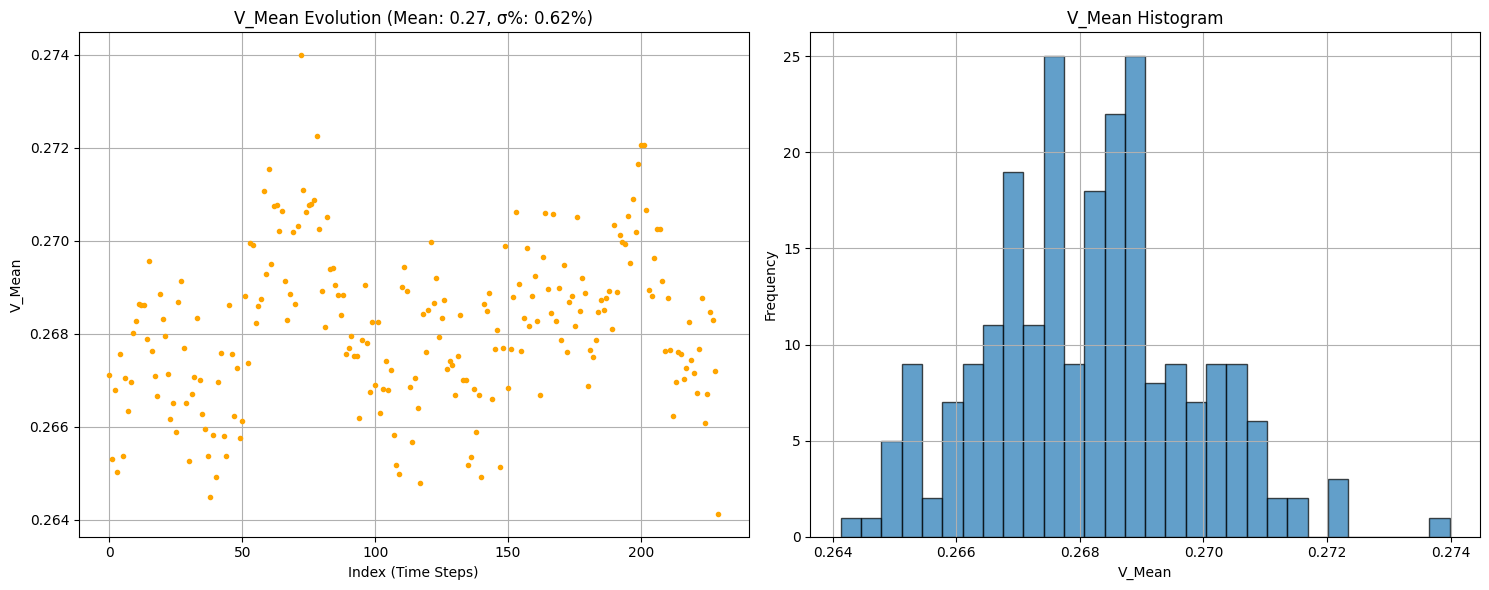


Analysis for file: ID_2_2.txt
pd_val:
  Mean: 1354.0449866453357
  Standard Deviation (σ): 5.1083287792375245
  Standard Deviation as Percentage of Mean: 0.37726433239810414%


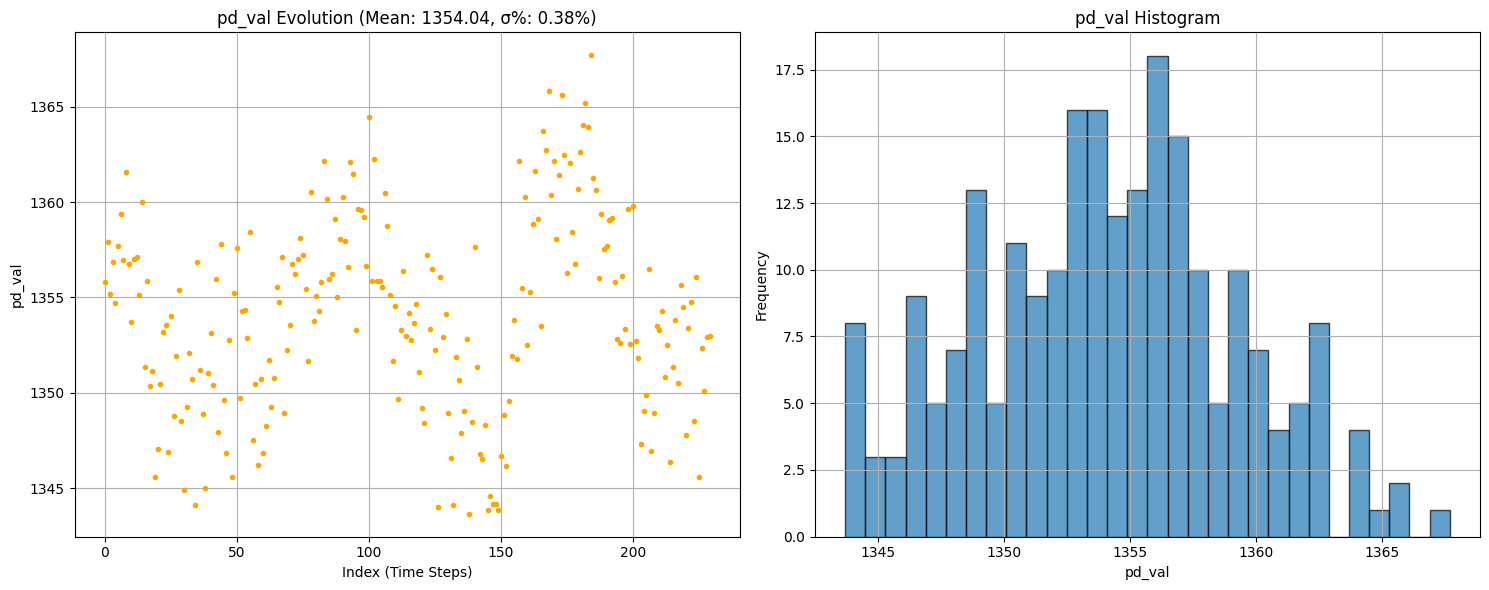

pd_val_norm:
  Mean: 5034.3759262356425
  Standard Deviation (σ): 24.21120709690955
  Standard Deviation as Percentage of Mean: 0.48091774336393295%


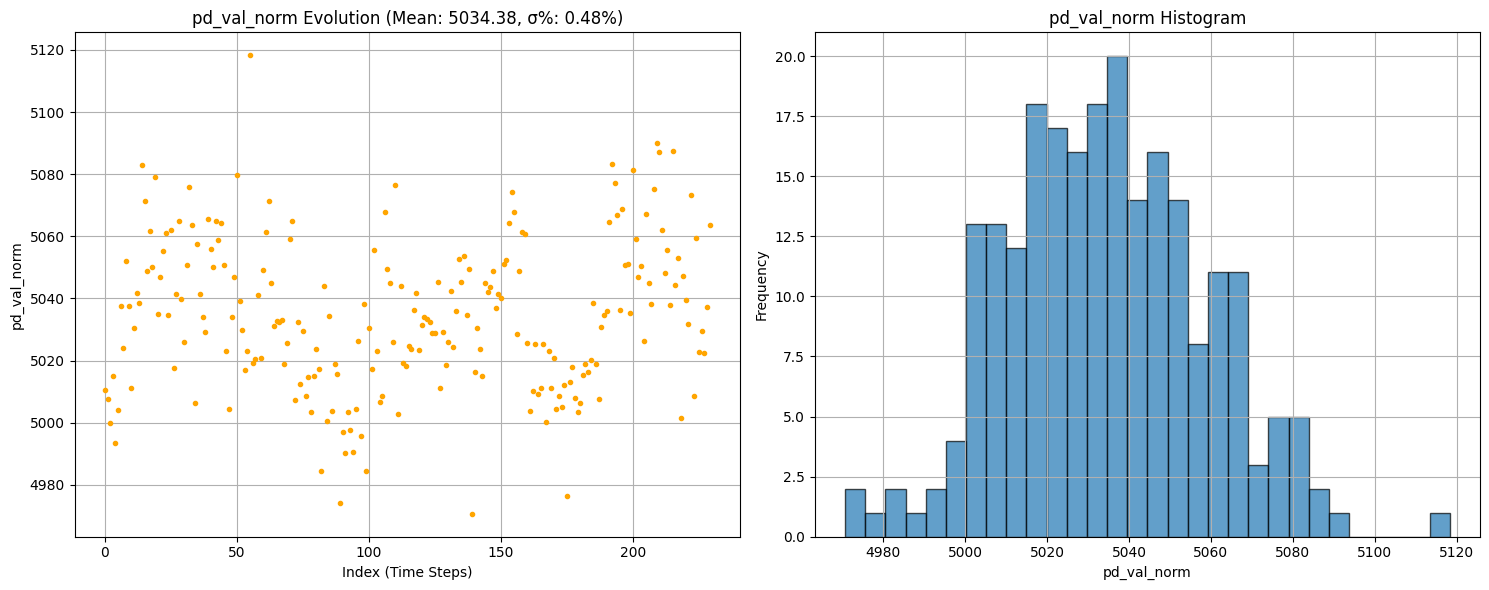

V_Mean:
  Mean: 0.26896705982608693
  Standard Deviation (σ): 0.0018047455293126126
  Standard Deviation as Percentage of Mean: 0.670991284389826%


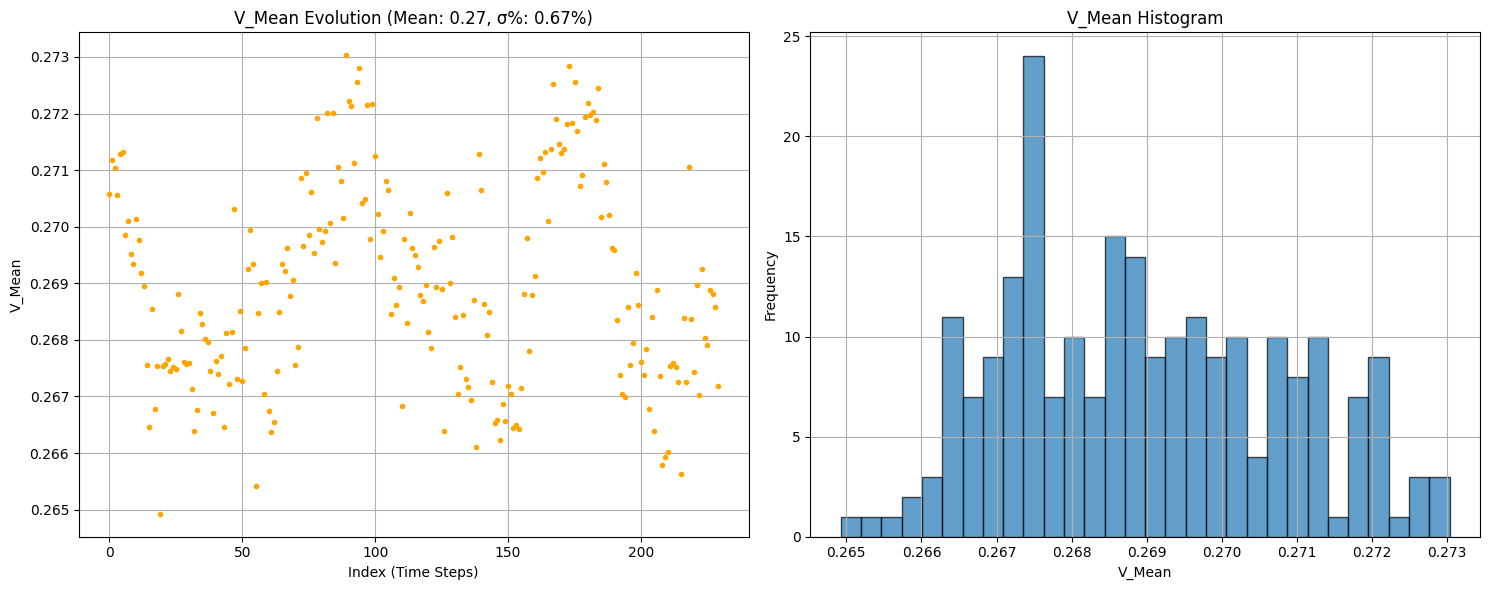


Analysis for file: ID_4_1.txt
pd_val:
  Mean: 3358.172586702352
  Standard Deviation (σ): 12.13248463645877
  Standard Deviation as Percentage of Mean: 0.3612823439897289%


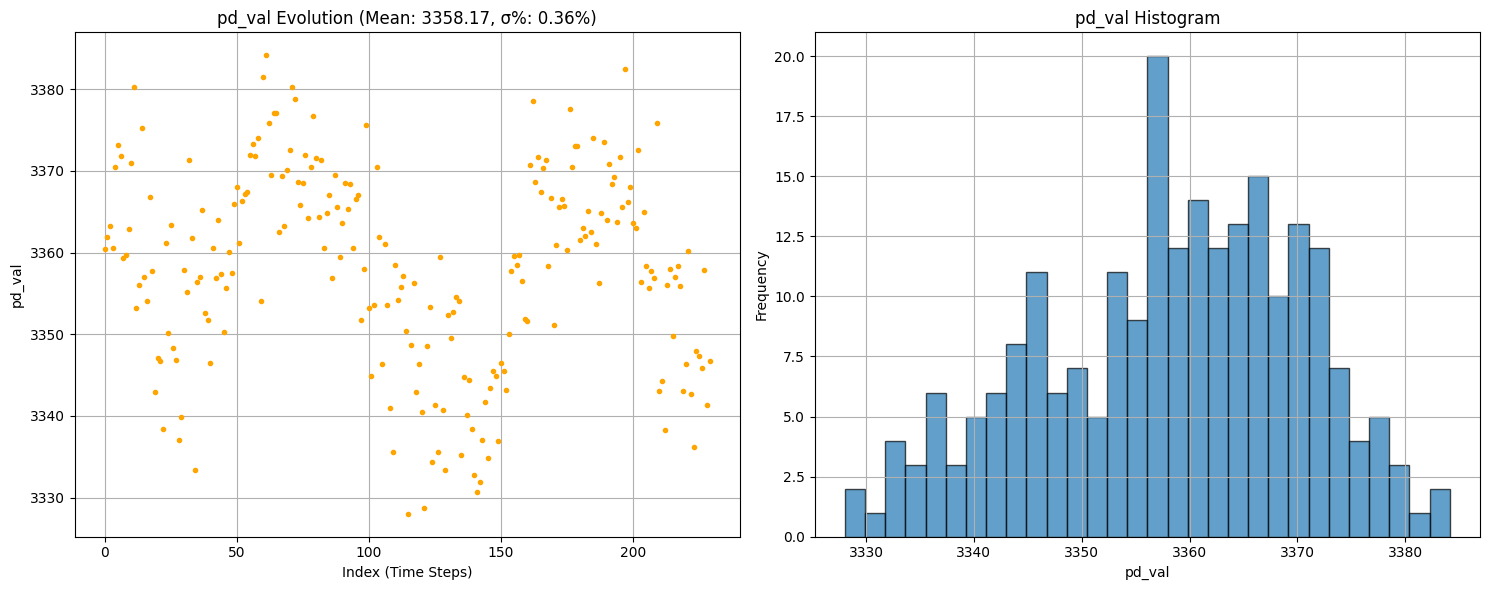

pd_val_norm:
  Mean: 12505.11384846139
  Standard Deviation (σ): 55.224214737924605
  Standard Deviation as Percentage of Mean: 0.4416130505258799%


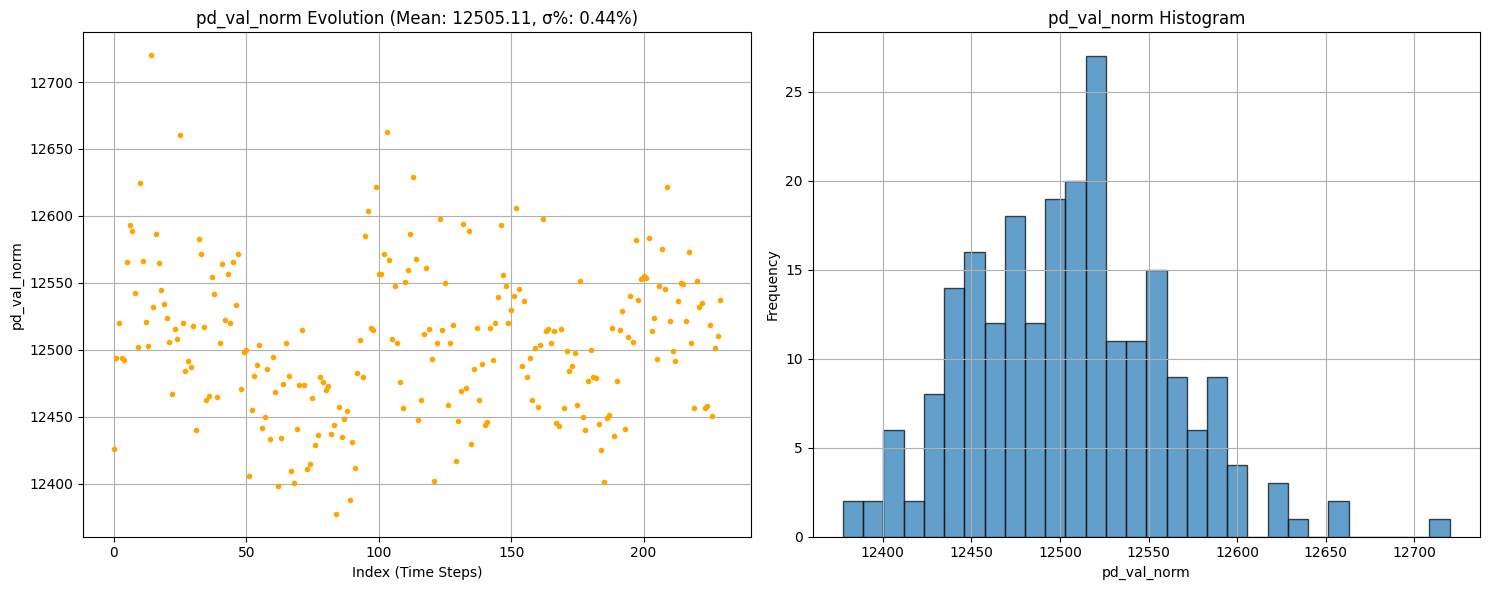

V_Mean:
  Mean: 0.26854899963043477
  Standard Deviation (σ): 0.001505526578480715
  Standard Deviation as Percentage of Mean: 0.560615224987825%


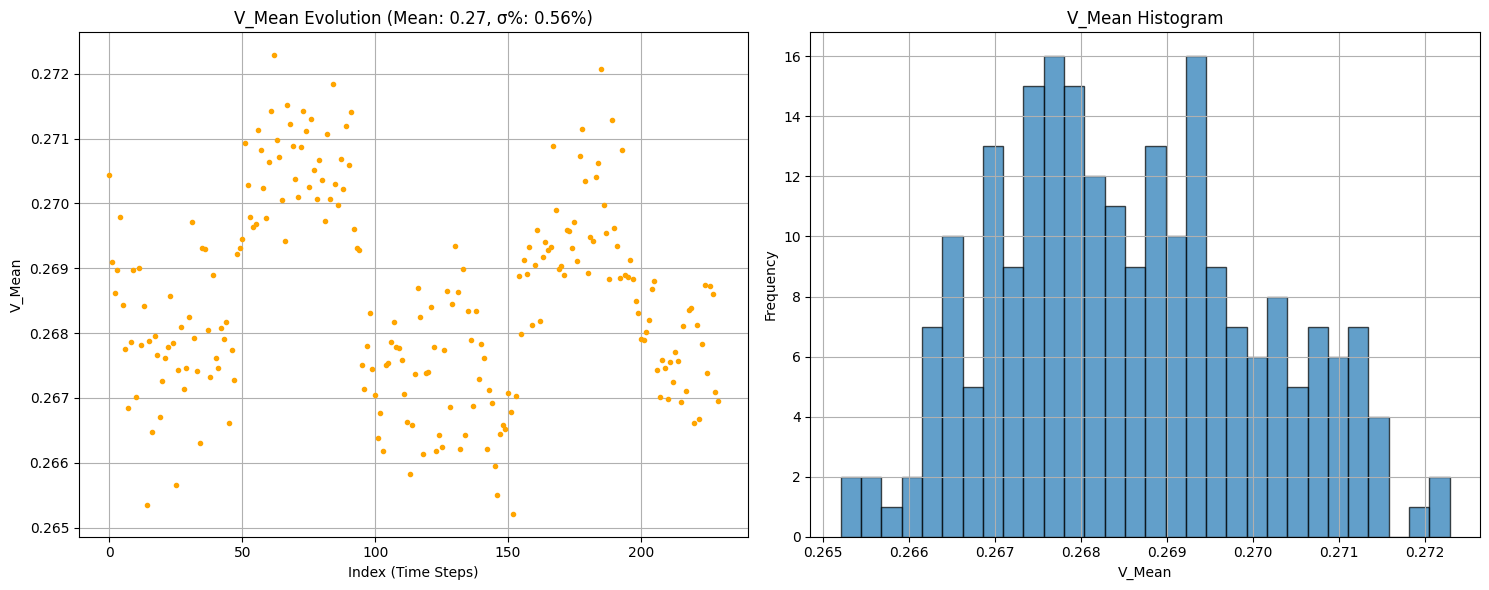


Analysis for file: ID_4_3.txt
pd_val:
  Mean: 3366.552639439017
  Standard Deviation (σ): 18.958413531252273
  Standard Deviation as Percentage of Mean: 0.5631402672619844%


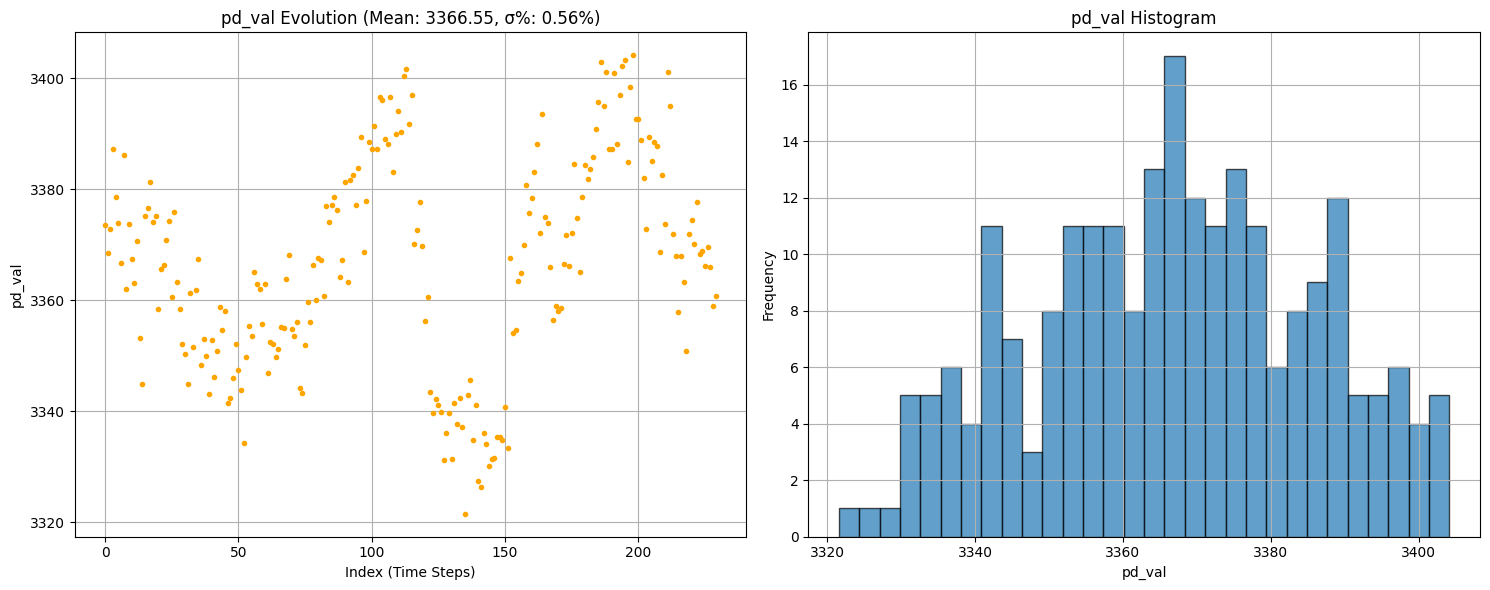

pd_val_norm:
  Mean: 12566.330674780616
  Standard Deviation (σ): 82.9100589339171
  Standard Deviation as Percentage of Mean: 0.659779382539323%


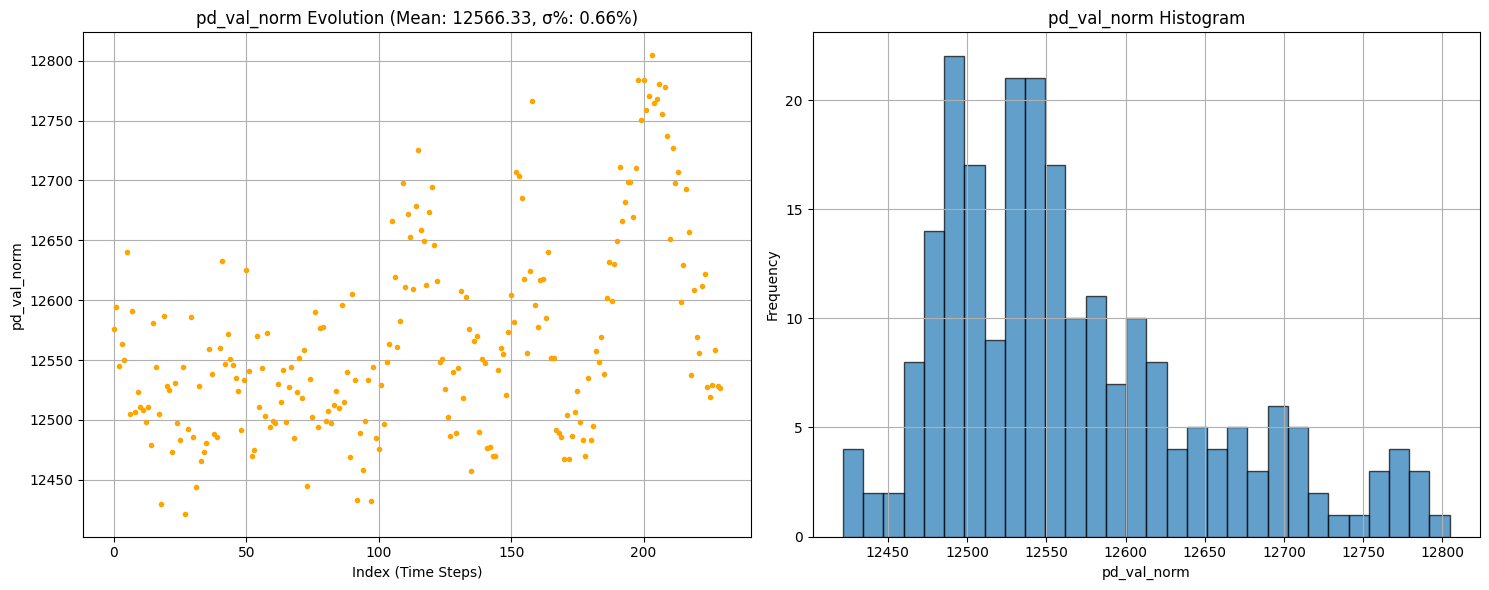

V_Mean:
  Mean: 0.26790964343478263
  Standard Deviation (σ): 0.0017187891036005909
  Standard Deviation as Percentage of Mean: 0.6415555190789526%


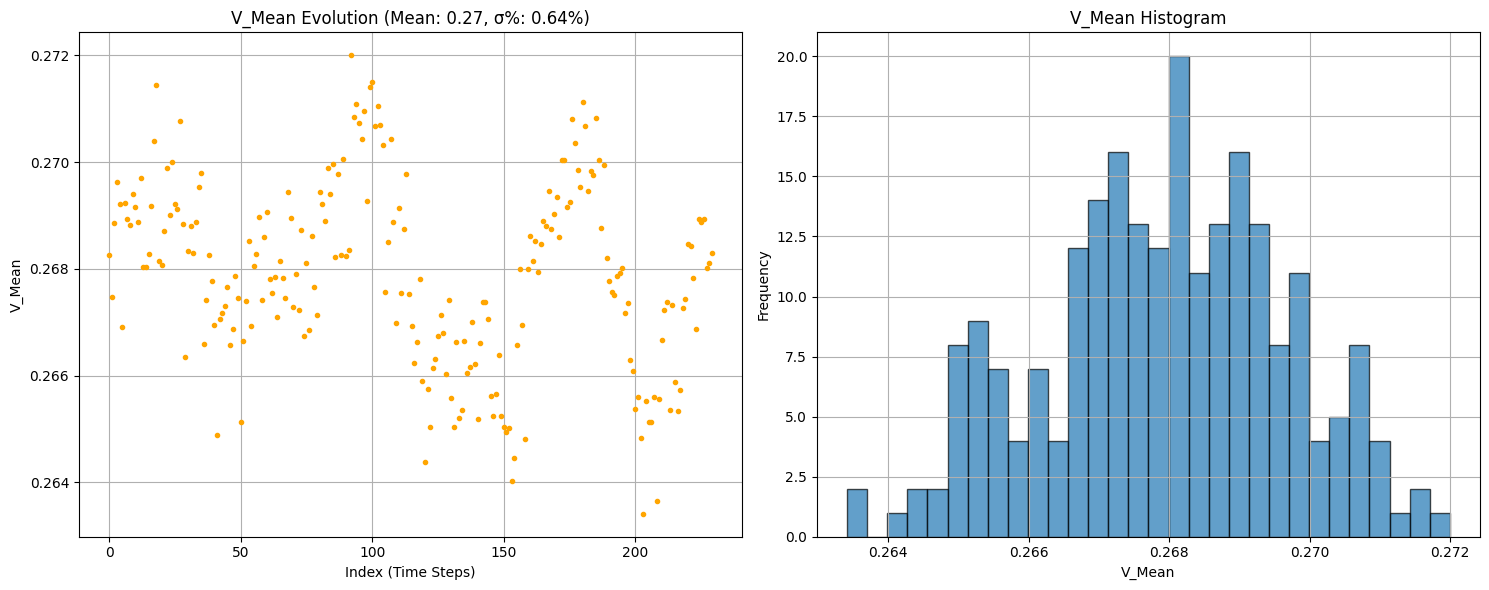

In [7]:
# List of columns to analyze and plot
columns_to_plot = ['pd_val', 'pd_val_norm', 'V_Mean']

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date-Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        df.loc[:, 'pd_val'] = df['Total_Sum']/df['Total_Counts']
        df.loc[:, 'pd_val_norm'] = df['pd_val']/df['V_Mean']
        sensor_id = file_name.split('.')[0]
        print(f'\nAnalysis for file: {file_name}')
        
        # Loop through each column, calculate mean and standard deviation, and plot both the histogram and line plot
        for column in columns_to_plot:
            # Calculate mean and standard deviation (sigma)
            mean_value = df[column].mean()
            std_dev = df[column].std()  # Standard deviation

            # Calculate sigma as a percentage of the mean
            sigma_percentage = (std_dev / mean_value) * 100 if mean_value != 0 else 0
            
            # Print mean and sigma (standard deviation)
            print(f'{column}:')
            print(f'  Mean: {mean_value}')
            print(f'  Standard Deviation (σ): {std_dev}')
            print(f'  Standard Deviation as Percentage of Mean: {sigma_percentage}%')
            
            # Create a subplot with 2 plots side by side (1 row, 2 columns)
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size as necessary

            # Plot the evolution of values (line plot) on the left
            axs[0].plot(df[column], '.',color='orange')
            axs[0].set_title(f'{column} Evolution (Mean: {mean_value:.2f}, σ%: {sigma_percentage:.2f}%)')
            axs[0].set_xlabel('Index (Time Steps)')
            axs[0].set_ylabel(column)
            axs[0].grid(True)

            # Plot the histogram on the right
            axs[1].hist(df[column], bins=30, edgecolor='black', alpha=0.7)
            axs[1].set_title(f'{column} Histogram')
            axs[1].set_xlabel(column)
            axs[1].set_ylabel('Frequency')
            axs[1].grid(True)

            # Adjust the layout to prevent overlapping
            plt.tight_layout()
            
            # Show the combined plots
            plt.show()


## MEAN AND SIGMA OF EACH OF THE DATASETS, PLOT TOGETHER. 

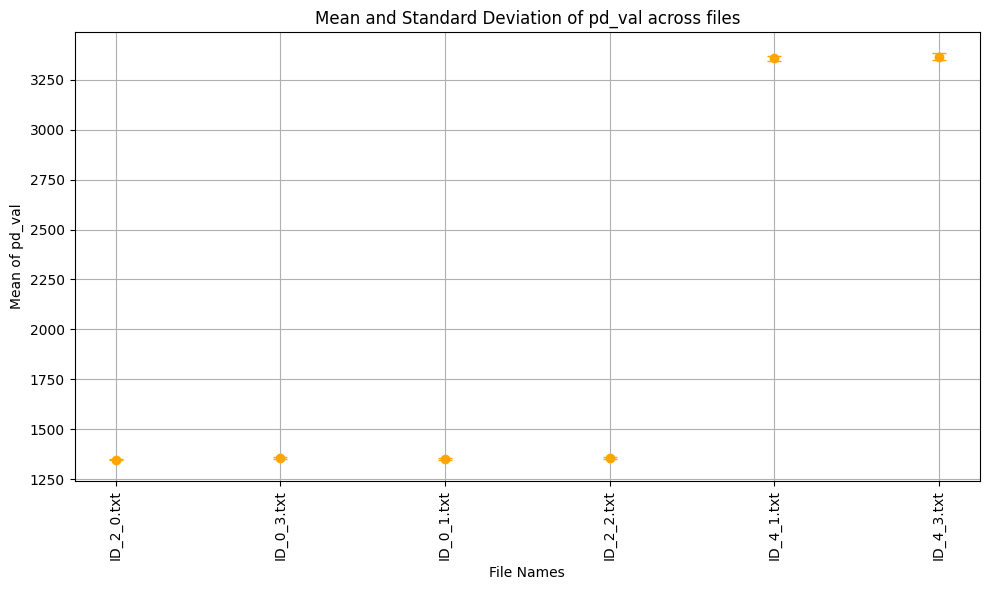

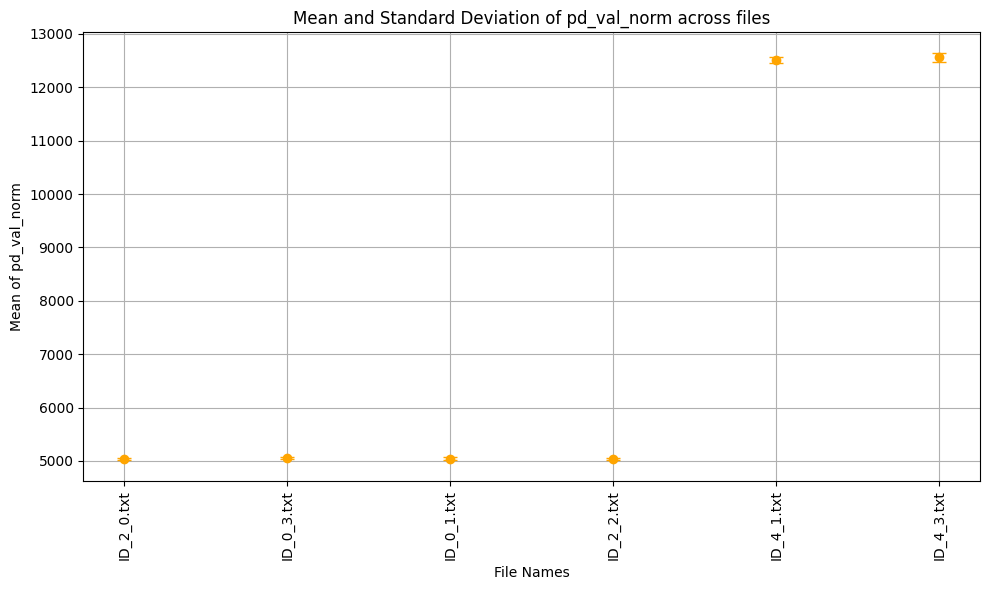

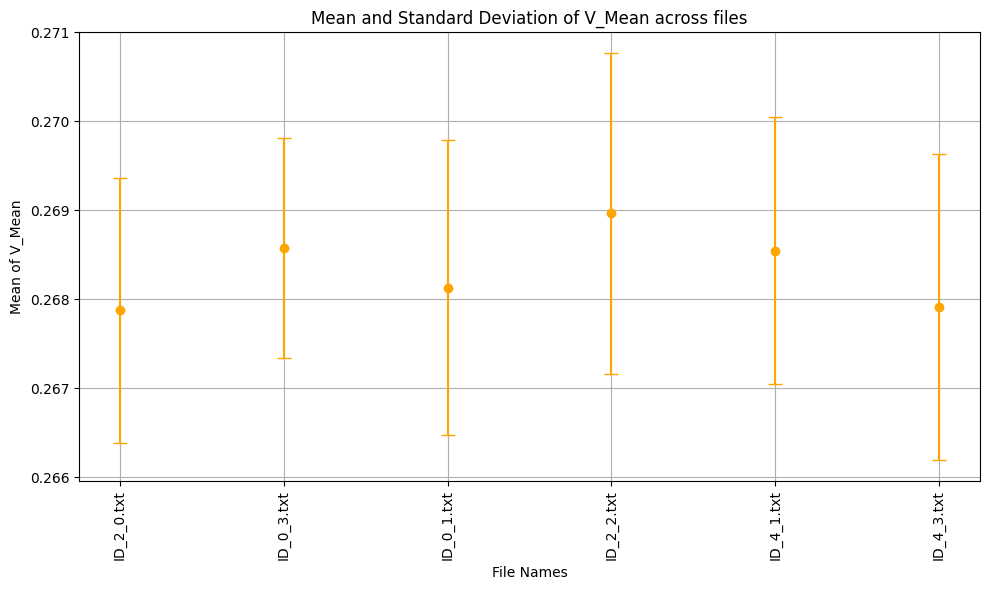

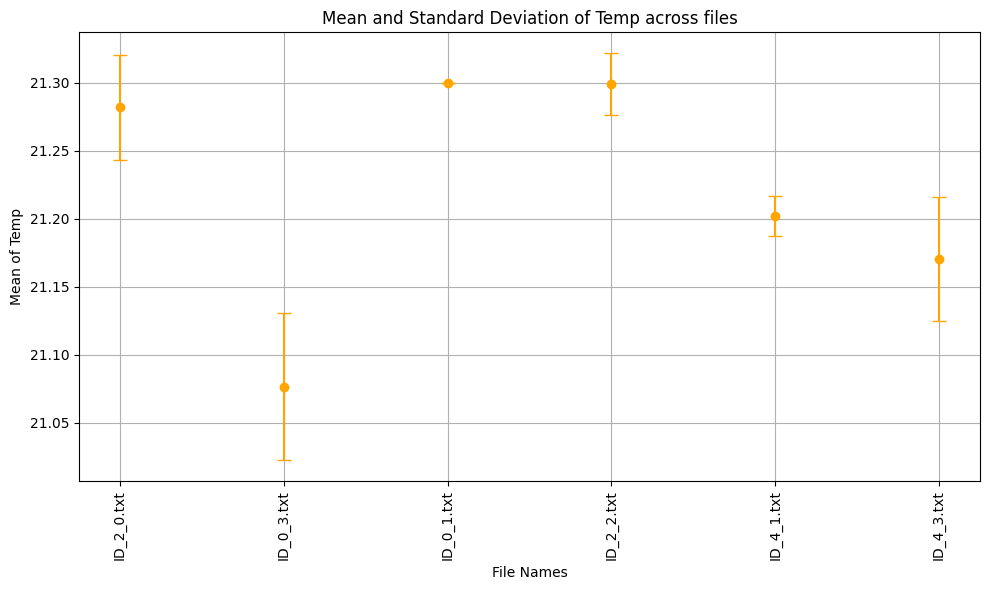

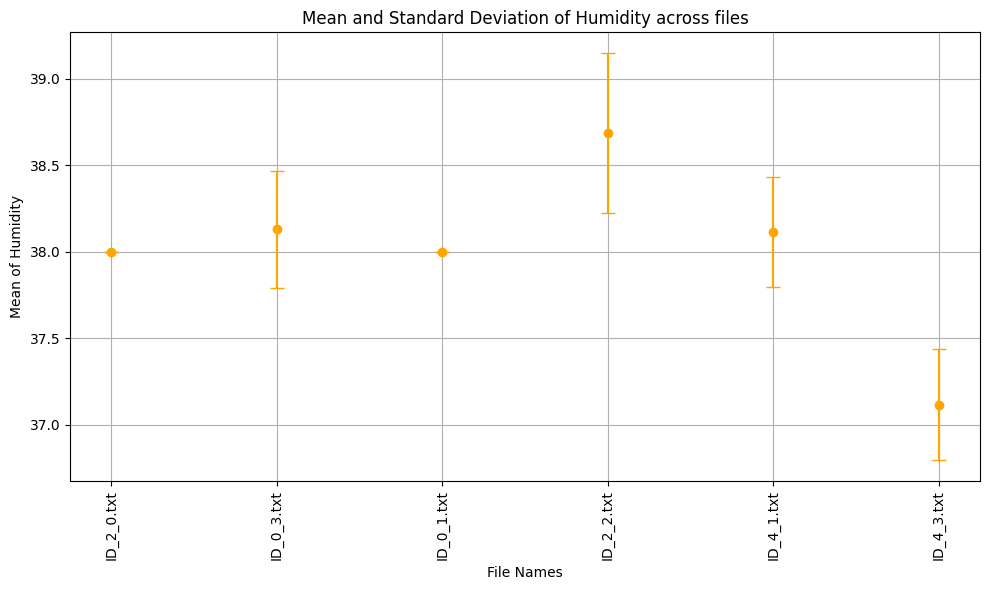

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# List of columns to analyze and plot
columns_to_analyze = ['pd_val', 'pd_val_norm', 'V_Mean', 'Temp', 'Humidity']

# Dictionary to store the mean and standard deviation for each file
mean_dict = {col: [] for col in columns_to_analyze}
std_dev_dict = {col: [] for col in columns_to_analyze}
file_names = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Only process .txt files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', header=None)
        
        # Assign the provided column names
        df.columns = ['Date Time', 'Laser_Power', 'Total_Sum', 'Total_Sqr', 'V_Mean', 'Std_V', 'Temp', 'Humidity', 'Total_Counts']
        df.loc[:, 'pd_val'] = df['Total_Sum']/df['Total_Counts']
        df.loc[:, 'pd_val_norm'] = df['pd_val']/df['V_Mean']
        sensor_id = file_name.split('.')[0]
                
        # Append the filename for the x-axis
        file_names.append(file_name)
        
        # Calculate the mean and standard deviation for each column and store them
        for column in columns_to_analyze:
            mean_value = df[column].mean()
            std_dev_value = df[column].std()  # Standard deviation
            
            # Append the mean and standard deviation to the corresponding list
            mean_dict[column].append(mean_value)
            std_dev_dict[column].append(std_dev_value)
# Now plot the means with standard deviation as error bars for each column across all files
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    
    # Plot Mean values with standard deviation as error bars (no connecting lines)
    plt.errorbar(file_names, mean_dict[column], color= 'orange',yerr=std_dev_dict[column], fmt='o', capsize=5, label='Mean ± σ')
    
    # Add title and labels
    plt.title(f'Mean and Standard Deviation of {column} across files')
    plt.xlabel('File Names')
    plt.ylabel(f'Mean of {column}')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()